In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore, stats

## **Read emplyees.csv dataset**


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Employees.csv')
df.head()

,Name,job_title,years_of_experience,salary
0,John Smith,Manager,10,80000
1,Mary Johnson,Developer,3,50000
2,Robert Lee,Developer,5,55000
3,Emily Chen,Designer,2,45000
4,David Kim,Developer,4,60000


# **Measure of Position**

### Q1:Calculate Percentiles for salary

> Hint: use np.percentile()




In [ ]:
salary_pth = np.percentile(df['salary'], [10, 60, 90])

print(f'10th Percentile: {salary_pth[0]}\n\
60th Percentile: {salary_pth[1]}\n\
90th Percentile : {salary_pth[2]}')

10th Percentile: 40000.0
60th Percentile: 55000.0
90th Percentile : 63999.999999999985


10th Percentile:  40000.0
60th Percentile:  45000.0
90th Percentile:  50000.0


### Q2: Calculate Quartiles for salary and(equivalent to 25th, 50th, and 75th percentiles)


> Hint: use column_name.quantile([])



In [ ]:
salary_q1 = df['salary'].quantile(0.25)
salary_q2 = df['salary'].quantile(0.5)
salary_q3 = df['salary'].quantile(0.75)

print(f'25th Quartile: {salary_q1}\n\
50th Quartile: {salary_q2}\n\
75th Quartile: {salary_q3}')

25th Quartile: 45000.0
50th Quartile: 50000.0
75th Quartile: 55000.0


25th Quartile:  45000.0
50th Quartile:  50000.0
75th Quartile:  55000.0


### Q3: Calculate Deciles for salary

> Hint: use np.percentile()




In [ ]:
salary_deciles = np.percentile(df['salary'], np.arange(10, 100, 10))

sum = 10
for d in salary_deciles:
  print(f'{sum}th Decile: {d}')
  sum+=10

10th Decile: 40000.0
20th Decile: 45000.0
30th Decile: 45000.0
40th Decile: 50000.0
50th Decile: 50000.0
60th Decile: 55000.0
70th Decile: 55000.0
80th Decile: 60000.0
90th Decile: 63999.999999999985


10th Decile: 40000.0
20th Decile: 45000.0
30th Decile: 45000.0
40th Decile: 50000.0
50th Decile: 50000.0
60th Decile: 55000.0
70th Decile: 55000.0
80th Decile: 60000.0
90th Decile: 63999.999999999985


# **Outlier Detections**

### Q1: Calculate the z-score of the salary, then find the range of z-scores

In [ ]:
salary_zscore = stats.zscore(df['salary'])
salary_zscore

<ipython-input-21-b23f52657995>:1: DeprecationWarning: Please use `zscore` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  salary_zscore = stats.zscore(df['salary'])


0     1.902629
1    -0.241057
2     0.116224
3    -0.598338
4     0.473505
        ...   
78   -0.955619
79    0.473505
80   -0.598338
81   -0.241057
82   -0.955619
Name: salary, Length: 83, dtype: float64

0     1.891133
1    -0.239601
2     0.115522
3    -0.594723
4     0.470644
        ...   
78   -0.949845
79    0.470644
80   -0.594723
81   -0.239601
82   -0.949845
Name: salary z-score, Length: 83, dtype: float64

In [ ]:
salary_zrange = (salary_zscore.min(), salary_zscore.max())
salary_zrange

(-0.9556190804187417, 4.760877040284363)

(-0.9498448941391877, 4.732110148279017)

### Q2: Check if there is outlier in 'salary' feature or not based on Z-score method


In [ ]:
df['salary_zscores'] = salary_zscore
low_zoutlier = df[(salary_zscore < -3 )]
high_zoutlier = df[(salary_zscore > 3 )]

# higher bound
high_zoutlier

,Name,job_title,years_of_experience,salary,salary_zscores
17,Sophie Chen,Manager,12,120000,4.760877


,Name,job_title,years_of_experience,salary,salary z-score,salary outlier_zscore
17,Sophie Chen,Manager,12,120000,4.73211,True


### Q3: Check if there is outlier in 'salary' feature or not based on IRQ method

In [ ]:
salary_iqr = salary_q3 - salary_q1
low_salaryq = salary_q1 - 1.5 * salary_iqr
high_salaryq = salary_q3 + 1.5 * salary_iqr

outliers_iqr_lower = df[(df['salary'] < low_salaryq)]
outliers_iqr_higher = df[(df['salary'] > high_salaryq)]

print(outliers_iqr_lower, outliers_iqr_higher)

Empty DataFrame
Columns: [Name , job_title, years_of_experience, salary, salary_zscores]
Index: []             Name    job_title  years_of_experience  salary  salary_zscores
0      John Smith     Manager                   10   80000        1.902629
7    Jessica Chen     Manager                    8   90000        2.617191
17    Sophie Chen     Manager                   12  120000        4.760877
29     Angela Kim     Manager                    9   95000        2.974472
47       Kim Eric   Developer                    6   90000        2.617191
59       Kim Mary   Developer                   13   95000        2.974472


,Name,job_title,years_of_experience,salary,salary z-score,salary outlier_zscore,outlier_iqr
0,John Smith,Manager,10,80000,1.891133,False,True
7,Jessica Chen,Manager,8,90000,2.601377,False,True
17,Sophie Chen,Manager,12,120000,4.732110,True,True
29,Angela Kim,Manager,9,95000,2.956499,False,True
47,Kim Eric,Developer,6,90000,2.601377,False,True
59,Kim Mary,Developer,13,95000,2.956499,False,True


### Q4: Check if there is outliers in 'salary' feature using box plot

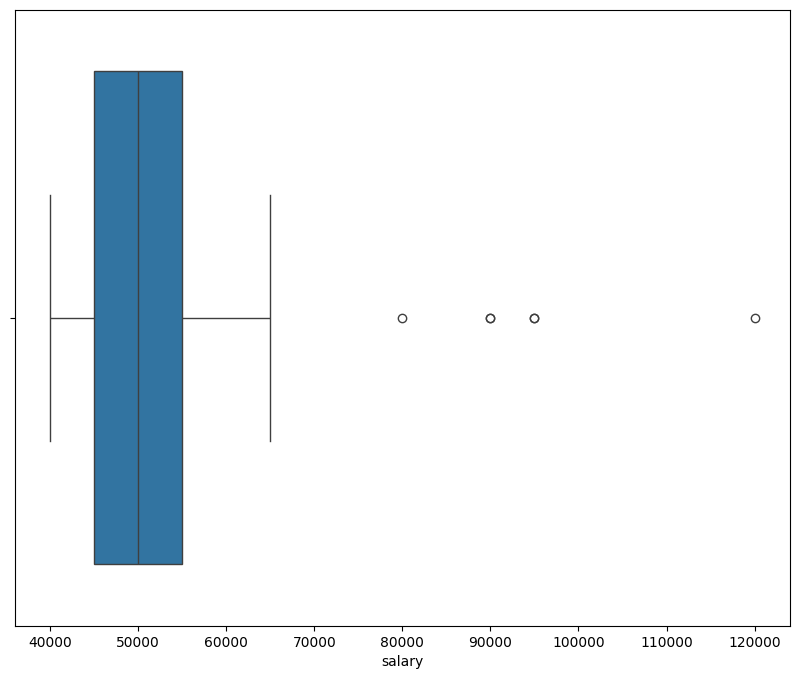

In [ ]:
plt.figure(figsize = [10, 8])
sns.boxplot(x = df['salary'])
plt.show()

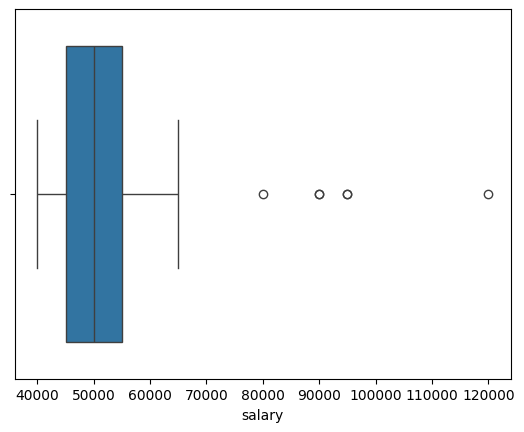

### Q5: Check if there is outliers in 'salary' feature using density plot

> Hint: use sns.kdeplot()



<ipython-input-30-e0c61f8fb739>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['salary'], shade = True)


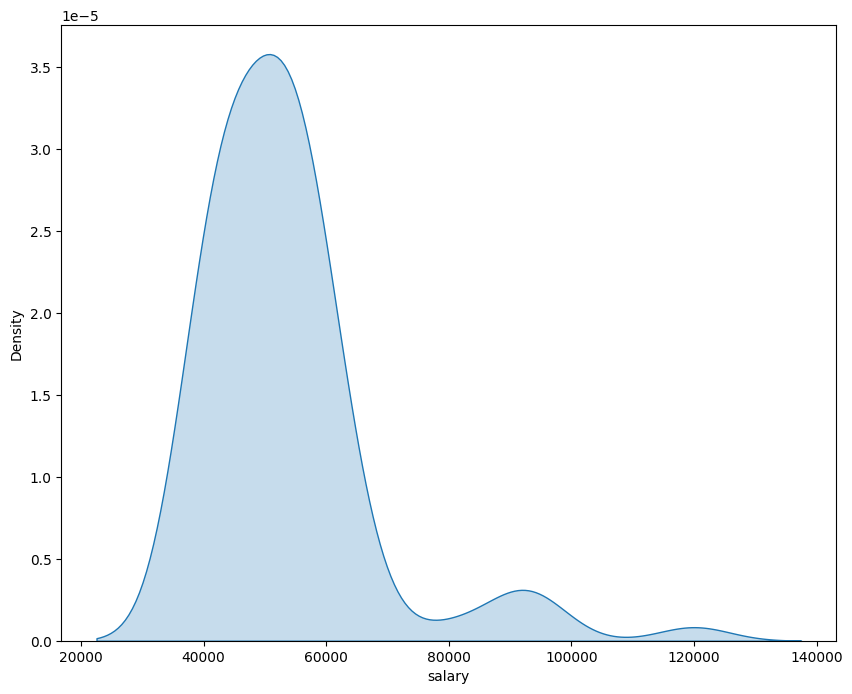

In [ ]:
plt.figure(figsize = [10, 8])
sns.kdeplot(df['salary'], shade = True)
plt.show()

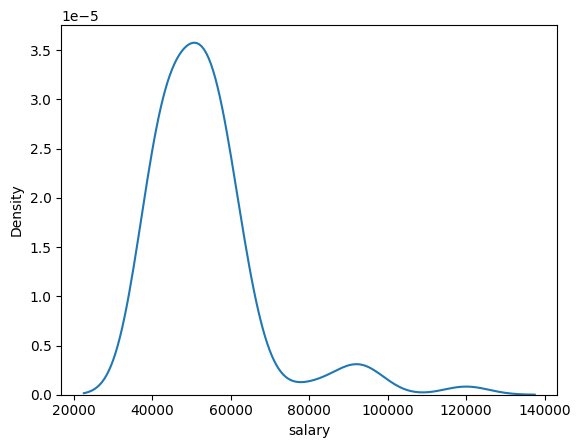

# **Contingency Table**

### Q1: Create a contingency table using pd.crosstab()


**Find contingency table between job_title and years_of_expreince**

In [ ]:
contingency0 = pd.crosstab(df['job_title'], df['years_of_experience'], margins = True)
contingency0

years_of_experience,1,2,3,4,5,6,7,8,9,10,11,12,13,14,All
job_title,,,,,,,,,,,,,,,
Designer,8,5,7,3,4,2,2,1,2,1,2,0,2,0,39
Developer,1,3,4,5,6,6,3,3,0,0,2,1,3,1,38
Manager,0,0,0,0,0,0,0,2,1,1,0,1,1,0,6
All,9,8,11,8,10,8,5,6,3,2,4,2,6,1,83


years_of_experience,1,2,3,4,5,6,7,8,9,10,11,12,13,14,All
job_title,,,,,,,,,,,,,,,
Designer,8,5,7,3,4,2,2,1,2,1,2,0,2,0,39
Developer,1,3,4,5,6,6,3,3,0,0,2,1,3,1,38
Manager,0,0,0,0,0,0,0,2,1,1,0,1,1,0,6
All,9,8,11,8,10,8,5,6,3,2,4,2,6,1,83


**Find contingency table between job_title and salary**

In [ ]:
contingency1 = pd.crosstab(df['job_title'], df['salary'], margins = True)
contingency1

salary,40000,45000,50000,55000,60000,65000,80000,90000,95000,120000,All
job_title,,,,,,,,,,,
Designer,13,10,7,5,2,2,0,0,0,0,39
Developer,3,5,6,13,8,1,0,1,1,0,38
Manager,0,0,0,2,0,0,1,1,1,1,6
All,16,15,13,20,10,3,1,2,2,1,83


salary,40000,45000,50000,55000,60000,65000,80000,90000,95000,120000,All
job_title,,,,,,,,,,,
Designer,13,10,7,5,2,2,0,0,0,0,39
Developer,3,5,6,13,8,1,0,1,1,0,38
Manager,0,0,0,2,0,0,1,1,1,1,6
All,16,15,13,20,10,3,1,2,2,1,83


### Q2: Calculate row percentages


**Find roe percentages contingency table between job_title and years_of_experience**

In [ ]:
row_percent0 = contingency0.div(contingency0['All'], axis = 0) * 100
row_percent0

years_of_experience,1,2,3,4,5,6,7,8,9,10,11,12,13,14,All
job_title,,,,,,,,,,,,,,,
Designer,20.512821,12.820513,17.948718,7.692308,10.256410,5.128205,5.128205,2.564103,5.128205,2.564103,5.128205,0.000000,5.128205,0.000000,100.0
Developer,2.631579,7.894737,10.526316,13.157895,15.789474,15.789474,7.894737,7.894737,0.000000,0.000000,5.263158,2.631579,7.894737,2.631579,100.0
Manager,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.333333,16.666667,16.666667,0.000000,16.666667,16.666667,0.000000,100.0
All,10.843373,9.638554,13.253012,9.638554,12.048193,9.638554,6.024096,7.228916,3.614458,2.409639,4.819277,2.409639,7.228916,1.204819,100.0


years_of_experience,1,2,3,4,5,6,7,8,9,10,11,12,13,14,All
job_title,,,,,,,,,,,,,,,
Designer,20.512821,12.820513,17.948718,7.692308,10.256410,5.128205,5.128205,2.564103,5.128205,2.564103,5.128205,0.000000,5.128205,0.000000,100.0
Developer,2.631579,7.894737,10.526316,13.157895,15.789474,15.789474,7.894737,7.894737,0.000000,0.000000,5.263158,2.631579,7.894737,2.631579,100.0
Manager,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.333333,16.666667,16.666667,0.000000,16.666667,16.666667,0.000000,100.0
All,10.843373,9.638554,13.253012,9.638554,12.048193,9.638554,6.024096,7.228916,3.614458,2.409639,4.819277,2.409639,7.228916,1.204819,100.0


**Find row percentages contingency table between job_title and salary**

In [ ]:
row_percentage1 = contingency1.div(contingency1['All'], axis = 0) * 100
row_percentage1

salary,40000,45000,50000,55000,60000,65000,80000,90000,95000,120000,All
job_title,,,,,,,,,,,
Designer,33.333333,25.641026,17.948718,12.820513,5.128205,5.128205,0.000000,0.000000,0.000000,0.000000,100.0
Developer,7.894737,13.157895,15.789474,34.210526,21.052632,2.631579,0.000000,2.631579,2.631579,0.000000,100.0
Manager,0.000000,0.000000,0.000000,33.333333,0.000000,0.000000,16.666667,16.666667,16.666667,16.666667,100.0
All,19.277108,18.072289,15.662651,24.096386,12.048193,3.614458,1.204819,2.409639,2.409639,1.204819,100.0


salary,40000,45000,50000,55000,60000,65000,80000,90000,95000,120000,All
job_title,,,,,,,,,,,
Designer,33.333333,25.641026,17.948718,12.820513,5.128205,5.128205,0.000000,0.000000,0.000000,0.000000,100.0
Developer,7.894737,13.157895,15.789474,34.210526,21.052632,2.631579,0.000000,2.631579,2.631579,0.000000,100.0
Manager,0.000000,0.000000,0.000000,33.333333,0.000000,0.000000,16.666667,16.666667,16.666667,16.666667,100.0
All,19.277108,18.072289,15.662651,24.096386,12.048193,3.614458,1.204819,2.409639,2.409639,1.204819,100.0


### Q3: Calculate column percentages


**Find column percentages contingency table between job_title and years_of_experience**

In [ ]:
col_percentage0 = contingency0.div(contingency0.loc['All'], axis = 1) * 100
col_percentage0

years_of_experience,1,2,3,4,5,6,7,8,9,10,11,12,13,14,All
job_title,,,,,,,,,,,,,,,
Designer,88.888889,62.5,63.636364,37.5,40.0,25.0,40.0,16.666667,66.666667,50.0,50.0,0.0,33.333333,0.0,46.987952
Developer,11.111111,37.5,36.363636,62.5,60.0,75.0,60.0,50.000000,0.000000,0.0,50.0,50.0,50.000000,100.0,45.783133
Manager,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,33.333333,33.333333,50.0,0.0,50.0,16.666667,0.0,7.228916
All,100.000000,100.0,100.000000,100.0,100.0,100.0,100.0,100.000000,100.000000,100.0,100.0,100.0,100.000000,100.0,100.000000


years_of_experience,1,2,3,4,5,6,7,8,9,10,11,12,13,14,All
job_title,,,,,,,,,,,,,,,
Designer,88.888889,62.5,63.636364,37.5,40.0,25.0,40.0,16.666667,66.666667,50.0,50.0,0.0,33.333333,0.0,46.987952
Developer,11.111111,37.5,36.363636,62.5,60.0,75.0,60.0,50.000000,0.000000,0.0,50.0,50.0,50.000000,100.0,45.783133
Manager,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,33.333333,33.333333,50.0,0.0,50.0,16.666667,0.0,7.228916
All,100.000000,100.0,100.000000,100.0,100.0,100.0,100.0,100.000000,100.000000,100.0,100.0,100.0,100.000000,100.0,100.000000


**Find column percentages contingency table between job_title and salary**

In [ ]:
col_percentage1 = contingency1.div(contingency1.loc['All'], axis = 1) * 100
col_percentage1

salary,40000,45000,50000,55000,60000,65000,80000,90000,95000,120000,All
job_title,,,,,,,,,,,
Designer,81.25,66.666667,53.846154,25.0,20.0,66.666667,0.0,0.0,0.0,0.0,46.987952
Developer,18.75,33.333333,46.153846,65.0,80.0,33.333333,0.0,50.0,50.0,0.0,45.783133
Manager,0.00,0.000000,0.000000,10.0,0.0,0.000000,100.0,50.0,50.0,100.0,7.228916
All,100.00,100.000000,100.000000,100.0,100.0,100.000000,100.0,100.0,100.0,100.0,100.000000


salary,40000,45000,50000,55000,60000,65000,80000,90000,95000,120000,All
job_title,,,,,,,,,,,
Designer,81.25,66.666667,53.846154,25.0,20.0,66.666667,0.0,0.0,0.0,0.0,46.987952
Developer,18.75,33.333333,46.153846,65.0,80.0,33.333333,0.0,50.0,50.0,0.0,45.783133
Manager,0.00,0.000000,0.000000,10.0,0.0,0.000000,100.0,50.0,50.0,100.0,7.228916
All,100.00,100.000000,100.000000,100.0,100.0,100.000000,100.0,100.0,100.0,100.0,100.000000


### Q4: Plot the relationship between years_of_experience and salary uisng line plot and heat map

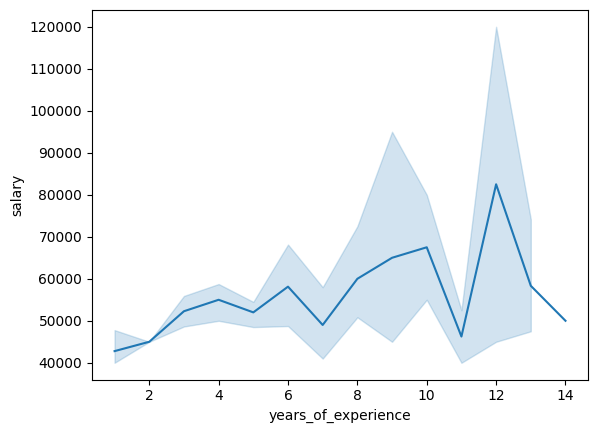

In [ ]:
sns.lineplot(df, x = 'years_of_experience', y = 'salary')
plt.show()

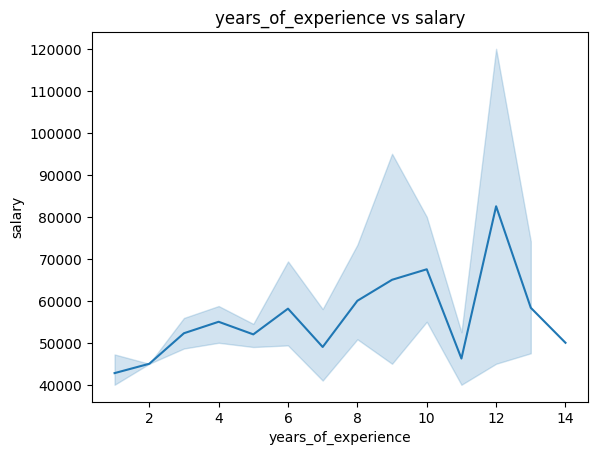

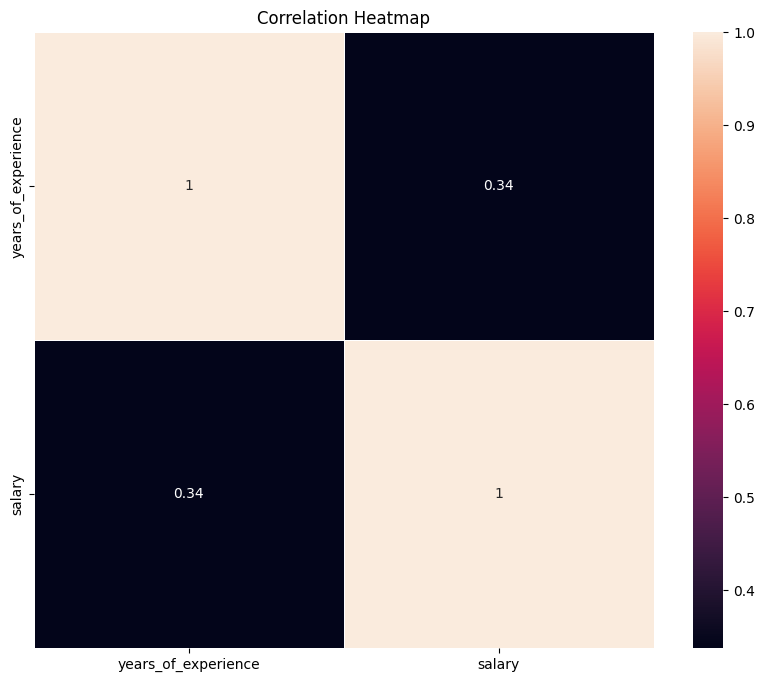

In [ ]:
dfcopy = df[['years_of_experience', 'salary']]
corr = dfcopy.corr()
plt.figure(figsize = (10, 8))
sns.heatmap(corr, annot = True, linewidth = 0.5)
plt.title('Correlation Heatmap')
plt.show()

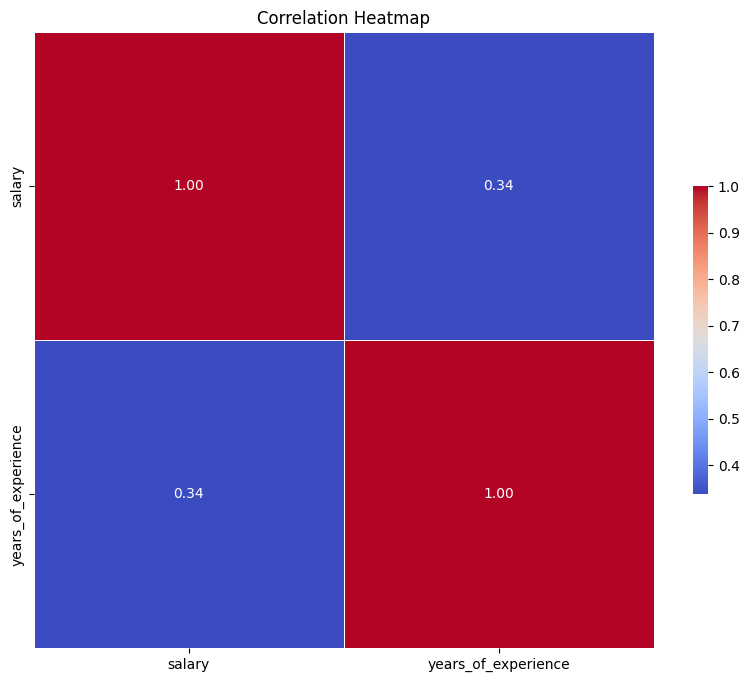